In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import re
from scipy import fft
%matplotlib inline

# Load medidas:

In [2]:
filenames=["DIF1Vpp1Hz.txt","DIF1Vpp10Hz.txt","DIF1Vpp100Hz.txt","DIF1Vpp500Hz.txt",
           "DIF1Vpp800Hz.txt","DIF1Vpp1KHz.txt","DIF1Vpp1.5KHz.txt","DIF1Vpp2KHz.txt"]

In [3]:
nfreq=len(filenames)

In [4]:
inpfreq=[]
for i in range(nfreq):
    times=1.
    iini=7
    ifin=len(filenames[i])-6
    if filenames[i][ifin-1:ifin]=="K": 
        ifin=ifin-1
        times=1e+3
    infreq=float(filenames[i][iini:ifin])*times
    inpfreq.append(infreq)

In [5]:
nfreq=len(filenames)
data=[]
for i in range(nfreq):
    print("open: ",filenames[i])
    dumm=np.loadtxt("freqDAQ/"+filenames[i],delimiter=";")
    data.append(dumm)

open:  DIF1Vpp1Hz.txt
open:  DIF1Vpp10Hz.txt
open:  DIF1Vpp100Hz.txt
open:  DIF1Vpp500Hz.txt
open:  DIF1Vpp800Hz.txt
open:  DIF1Vpp1KHz.txt
open:  DIF1Vpp1.5KHz.txt
open:  DIF1Vpp2KHz.txt


In [6]:
famp=["AMPLITUD_20mVpp_5Hz.txt","AMPLITUD_10Vpp_5Hz.txt","AMPLITUD_11Vpp_5Hz.txt"]
ftmp=["TIEMPO_10Vpp_5Hz.txt","TIEMPO_10Vpp_5Hz.txt","TIEMPO_11Vpp_5Hz.txt"]

In [7]:
dataamp=[]
datatmp=[]
namp=len(famp)
for i in range(namp):
    dummamp=np.loadtxt("amplitudDAQ/"+famp[i])
    dummtmp=np.loadtxt("amplitudDAQ/"+ftmp[i])
    dataamp.append(dummamp)
    datatmp.append(dummtmp)

# Plot frecuencias:

In [8]:
def fourier(y):
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/rat
    frq = k/T # two sides frequency range
    imax=int(n/2)
    frq = frq[1:imax] # one side frequency range
    Y = fft(y)/n # fft computing and normalization
    Y = Y[1:imax]
    return Y,frq

In [9]:
global rat
rat=1000

computed frequency: 1.953125


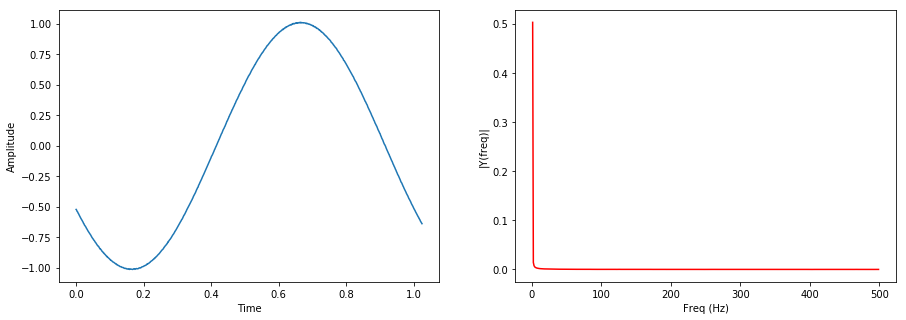

computed frequency: 9.765625


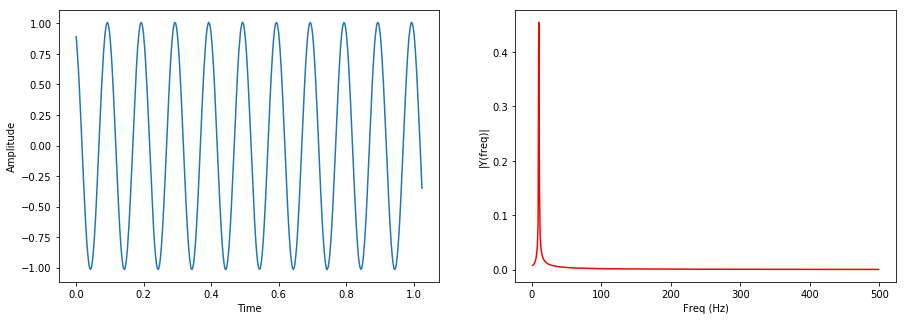

computed frequency: 100.5859375


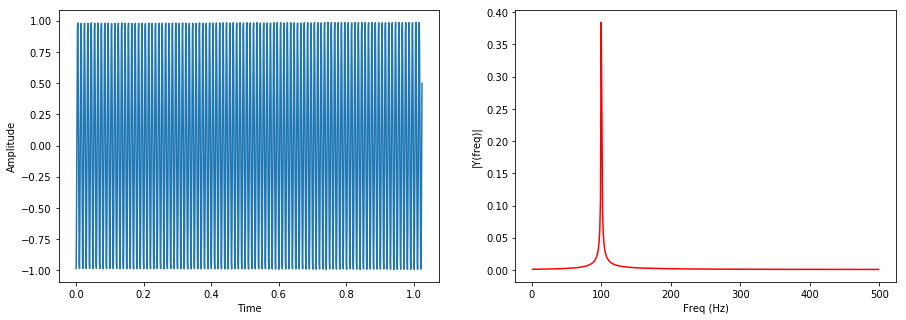

computed frequency: 499.0234375


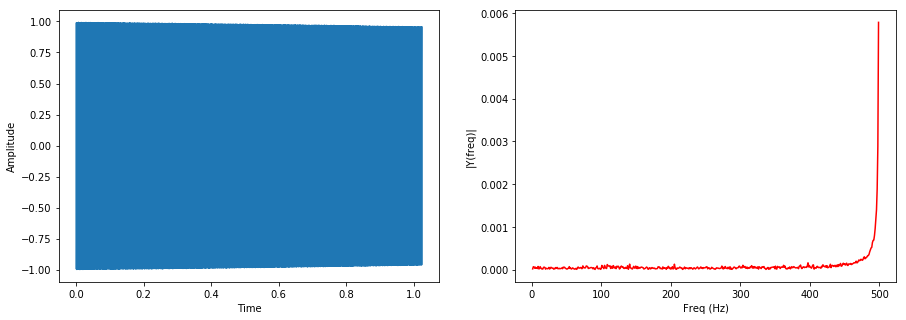

computed frequency: 200.1953125


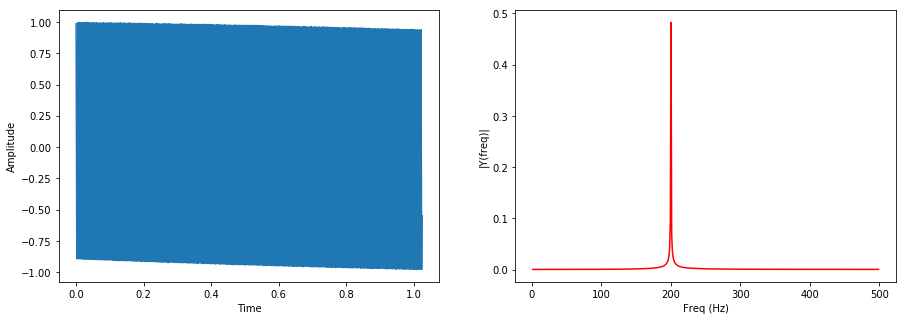

computed frequency: 458.984375


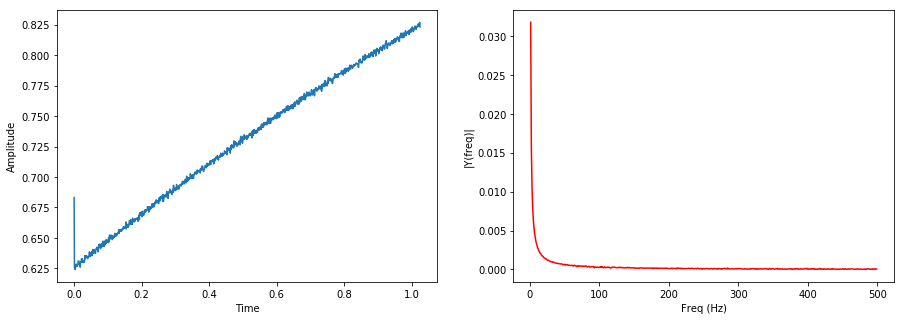

computed frequency: 163.0859375


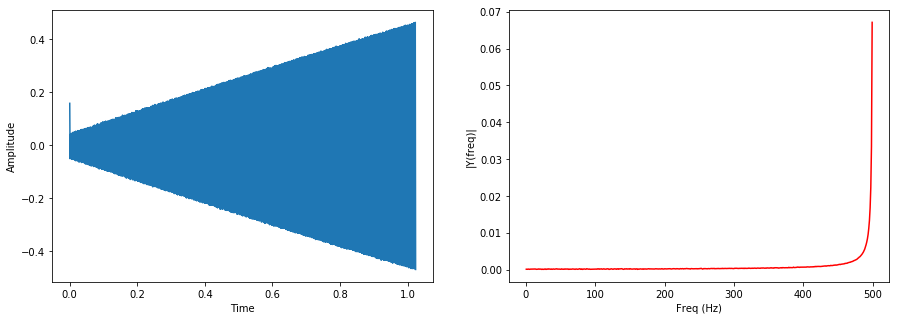

computed frequency: 339.84375


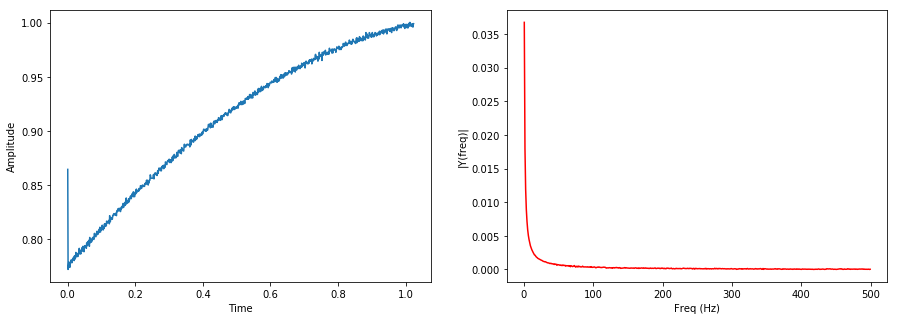

In [10]:
compfreq=[]
for i in range(nfreq):
    t=data[i][0]
    y=data[i][1]
    Y, frq=fourier(y)
    imax=np.argmax(Y)
    freq_max=frq[imax]
    compfreq.append(freq_max)
    print("computed frequency:",freq_max)
    fig=plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.show()

In [11]:
ifreq=2
print(filenames[ifreq])
t=data[ifreq][0]
y=data[ifreq][1]
Y, frq=fourier(y)

DIF1Vpp100Hz.txt


In [12]:
np.savetxt('transffourier_100Hz.txt', np.c_[frq,abs(Y)],delimiter=" ")

/home/ale/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


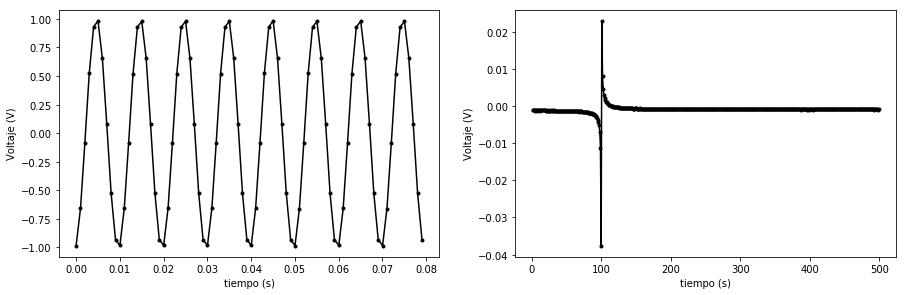

In [13]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot(221)
plt.plot(t[0:80],y[0:80],'ko',markersize='3',linestyle='solid')
ax1.set_xlabel("tiempo (s)",fontsize=10)
ax1.set_ylabel("Voltaje (V)",fontsize=10)
ax1=plt.subplot(222)
plt.plot(frq,Y,'ko',markersize='3',linestyle='solid')
ax1.set_xlabel("tiempo (s)",fontsize=10)
ax1.set_ylabel("Voltaje (V)",fontsize=10)
plt.show()
#plt.savefig()

# Plot respuesta en amplitud

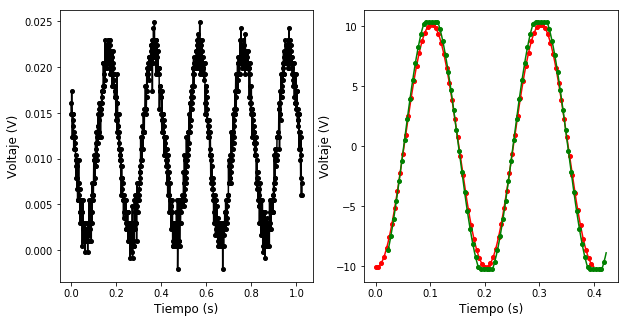

In [14]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(datatmp[0],dataamp[0],'k',linestyle='solid',marker='o',markersize=4,markevery=1)
plt.xlabel('Tiempo (s)',fontsize=12)
plt.ylabel('Voltaje (V)',fontsize=12)
plt.subplot(1,2,2)
plt.plot(datatmp[1][0:400],dataamp[1][0:400]*2,'r',linestyle='solid',marker='o',markersize=4,markevery=5)
plt.plot(datatmp[2][0:400]+0.023,dataamp[2][0:400]*2,'g',linestyle='solid',marker='o',markersize=4,markevery=5)
plt.xlabel('Tiempo (s)',fontsize=12)
plt.ylabel('Voltaje (V)',fontsize=12)
plt.savefig("DAQ_amplitud.jpg")
plt.show()

# Plot respuesta en frecuencia

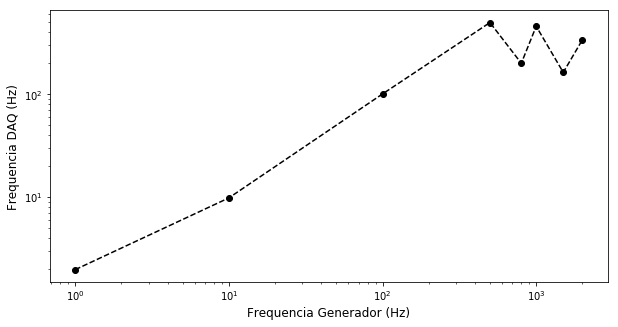

In [17]:
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(111)
plt.plot(inpfreq,compfreq,'ko',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
ax.set_xlabel("Frequencia Generador (Hz)",fontsize=12)
ax.set_ylabel("Frequencia DAQ (Hz)",fontsize=12)
plt.savefig("DAQ_logfrequency.jpg")
plt.show()

# Defasaje temporal DAQ

In [3]:
t=np.loadtxt("rampaDAQ/RESTA_RAMPA_TIEMPO.txt")
v=np.loadtxt("rampaDAQ/RESTA_RAMPA.txt")

In [5]:
difv=np.loadtxt("rampaDAQ/RESTA_DIFERENCIA.txt")

In [33]:
t_hist, dum_hist=np.histogram(difv,bins=10)
n_hist=len(dum_hist)

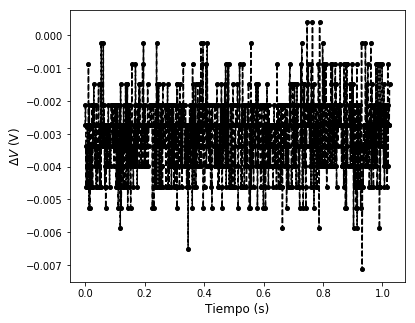

In [382]:
fig=plt.figure(figsize=(6,5))
plt.plot(t,difv,'k',linestyle='dashed',marker='o',markersize=4)
plt.xlabel('Tiempo (s)',fontsize=12)
plt.ylabel('$\Delta V$ (V)',fontsize=12)
plt.savefig("diferencia.jpg",bbox_inches='tight')
plt.show()

## convert bins to array

In [117]:
lv_hist=[]
for i in range(n_hist-1):
    diff=dum_hist[i]-dum_hist[i+1]
    lv_hist.append(dum_hist[i]-diff/2)

In [118]:
v_hist=np.array(lv_hist)

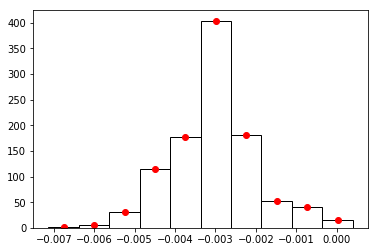

In [213]:
plt.hist(difv,color='white',ec='black')
plt.plot(v_hist,t_hist,'ro')
plt.show()

## fit with gaussian 

In [225]:
from scipy.optimize import curve_fit

In [384]:
tg=np.linspace(-0.007,0,100)

In [226]:
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2./(2.*sigma**2.))

In [227]:
coef_gauss,pcov = curve_fit(gauss,v_hist,t_hist,p0=[1,-0.003,0.001])

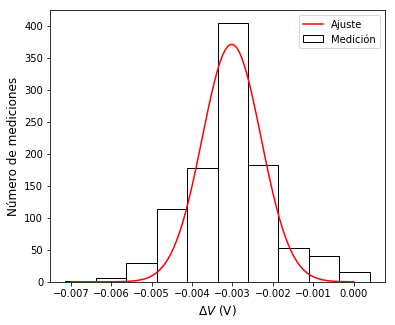

In [386]:
fig=plt.figure(figsize=(6,5))
plt.hist(difv,color='white',ec='black',label='Medición')
plt.plot(tg,gauss(tg,*coef_gauss),'r-',label='Ajuste')
plt.xlabel('$\Delta V$ (V)',fontsize=12)
plt.ylabel('Número de mediciones',fontsize=12)
plt.legend()
plt.savefig('histogramafit.jpg',bbox_inches='tight')
plt.show()

In [229]:
print("Coeficientes de la gaussiana: ")
print("      x0 =",coef_gauss[1])
print("   sigma =",coef_gauss[2])

Coeficientes de la gaussiana: 
      x0 = -0.0030192793659569454
   sigma = 0.0007279587029279864


## fit rampa con una función lineal

In [230]:
def lineal(x,a,b):
    return b+a*x

In [231]:
coef_lineal,pcov = curve_fit(lineal,t,v,p0=None)

In [373]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[1.25158345e-04 7.40125298e-05]


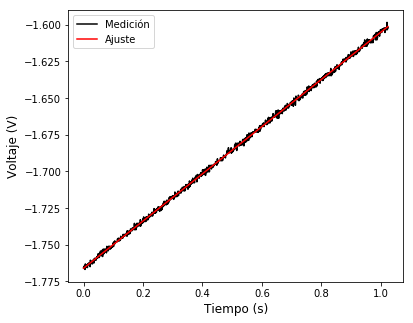

In [379]:
fig=plt.figure(figsize=(6,5))
plt.plot(t,v,'k',label='Medición')
plt.plot(t,lineal(t,*coef_lineal),'r-',label='Ajuste')
plt.xlabel('Tiempo (s)',fontsize=12)
plt.ylabel('Voltaje (V)',fontsize=12)
plt.legend()
plt.savefig('ajustelineal.jpg',bbox_inches='tight')
plt.show()

In [192]:
print("Coeficientes de la recta: ")
print("  a =",popt[0])
print("  b =",popt[1])

Coeficientes de la recta: 
  a = 0.16075865556059393
  b = -1.7659607336970697


In [193]:
tp=-vmean/popt[0]
tp_err=np.abs(-dv/popt[0])
print('t =',tp,'+-',tp_err)

t = 0.018661514613558246 +- 0.006220504871186082
